## Implementing backpropagation (BP) on feedforward perceptron neural network with 2 hidden layers for recognizing digits 0-9, assuming 7-segment display as input and outputs 1 when K (0..9) is input, else outputs 0. Using Sigmoidal activation fn. and MSE as loss function.


### (i) Examining effect of learning rate, hidden layers and nodes in each hidden layer.


### (ii) Studying convergence by plotting loss vs. iterations.


### (iii) Performing N-fold cross validation for evaluating performance metrics (Accuracy,Specificity, Sensitivity, Precession, Recall, and F-Measure)

In [171]:
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid Function

In [172]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [173]:
def sigmoid_derivative(x):
    return x * (1 - x)

### Neural Network

In [174]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
        self.bias_output = np.zeros((1, output_size))
    
    def train(self, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            # Forward propagation
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            output_layer_output = sigmoid(output_layer_input)
            # Calculate loss (MSE)
            loss = np.mean((y - output_layer_output) ** 2)
            losses.append(loss)
            # Backpropagation
            output_error = y - output_layer_output
            output_delta = output_error * sigmoid_derivative(output_layer_output)

            hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
            hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
            # Update weights and biases
            self.weights_hidden_output += hidden_layer_output.T.dot(output_delta) * self.learning_rate
            self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
            self.weights_input_hidden += X.T.dot(hidden_layer_delta) * self.learning_rate
            self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * self.learning_rate
        return losses

### Creating Dataframe for 7 segment LED panel for digital numbers

In [175]:
import pandas as pd

In [176]:
X = [[] for _ in range(128)]
for a in range(0,128):
    val=a
    if val>=64:
        X[a].append(1)
        val -= 64
    else:
        X[a].append(0)
    if val>=32:
        X[a].append(1)
        val -= 32
    else:
        X[a].append(0)
    if val>=16:
        X[a].append(1)
        val -= 16
    else:
        X[a].append(0)
    if val>=8:
        X[a].append(1)
        val -= 8
    else:
        X[a].append(0)
    if val>=4:
        X[a].append(1)
        val -= 4
    else:
        X[a].append(0)
    if val>=2:
        X[a].append(1)
        val -= 2
    else:
        X[a].append(0)
    if val>=1:
        X[a].append(1)
        val -= 1
    else:
        X[a].append(0)

In [177]:
Y = [[] for _ in range(128)]
for a in range(128):
    if a==126 or a==48 or a==109 or a==121 or a==51 or a==91 or a==31 or a==112 or a==127 or a==115:
        Y[a]=[1]
    else:
        Y[a]=[0]

In [178]:
df = pd.DataFrame()

In [179]:
df['Segment code']=X

In [180]:
df['Valid digit']=Y

In [181]:
df

,Segment code,Valid digit
0,"[0, 0, 0, 0, 0, 0, 0]",[0]
1,"[0, 0, 0, 0, 0, 0, 1]",[0]
2,"[0, 0, 0, 0, 0, 1, 0]",[0]
3,"[0, 0, 0, 0, 0, 1, 1]",[0]
4,"[0, 0, 0, 0, 1, 0, 0]",[0]
...,...,...
123,"[1, 1, 1, 1, 0, 1, 1]",[0]
124,"[1, 1, 1, 1, 1, 0, 0]",[0]
125,"[1, 1, 1, 1, 1, 0, 1]",[0]
126,"[1, 1, 1, 1, 1, 1, 0]",[1]


In [182]:
df['Valid digit'].value_counts()

[0]    118
[1]     10
Name: Valid digit, dtype: int64

In [183]:
df2 = df.copy()

In [184]:
digits = [126, 48, 109, 121, 51, 91, 31, 112, 127, 115]
for i in range(128,228):
    df2.loc[i] = df2.loc[digits[i%10]]

In [185]:
df2

,Segment code,Valid digit
0,"[0, 0, 0, 0, 0, 0, 0]",[0]
1,"[0, 0, 0, 0, 0, 0, 1]",[0]
2,"[0, 0, 0, 0, 0, 1, 0]",[0]
3,"[0, 0, 0, 0, 0, 1, 1]",[0]
4,"[0, 0, 0, 0, 1, 0, 0]",[0]
...,...,...
223,"[1, 1, 1, 1, 0, 0, 1]",[1]
224,"[0, 1, 1, 0, 0, 1, 1]",[1]
225,"[1, 0, 1, 1, 0, 1, 1]",[1]
226,"[0, 0, 1, 1, 1, 1, 1]",[1]


In [186]:
df2['Valid digit'].value_counts()

[0]    118
[1]    110
Name: Valid digit, dtype: int64

In [187]:
df2 = df2.sample(frac=1, random_state=1).reset_index()

In [188]:
df2.drop(columns="index", inplace=True)

In [189]:
df2

,Segment code,Valid digit
0,"[0, 1, 0, 0, 1, 1, 1]",[0]
1,"[1, 1, 1, 0, 0, 1, 1]",[1]
2,"[1, 0, 1, 1, 1, 0, 1]",[0]
3,"[0, 1, 1, 1, 1, 1, 0]",[0]
4,"[1, 1, 1, 1, 1, 1, 1]",[1]
...,...,...
223,"[1, 1, 1, 1, 0, 0, 1]",[1]
224,"[1, 1, 1, 0, 0, 0, 0]",[1]
225,"[1, 0, 0, 1, 0, 0, 0]",[0]
226,"[1, 1, 1, 1, 1, 1, 0]",[1]


In [ ]:
### Training and Testing

In [190]:
X = np.array(list(df2['Segment code']))
Y = np.array(list(df2['Valid digit']))

In [191]:
input_size = (X).shape[1]
hidden_size = 2
output_size = 1
learning_rate = 0.00001
epochs = 10000

In [192]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
losses = nn.train(X, Y, epochs)

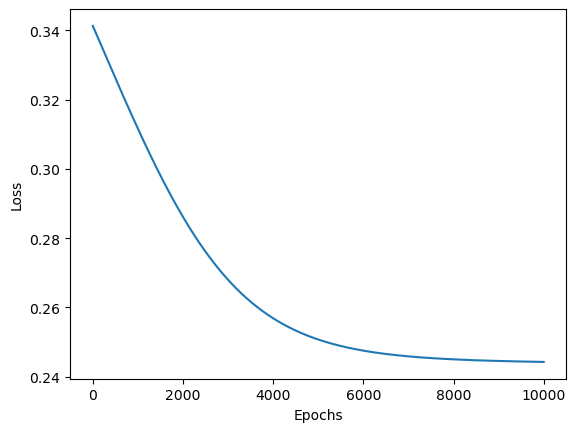

In [193]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [194]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [195]:
from sklearn.model_selection import KFold

In [196]:
input_size = X.shape[1]
hidden_size = 2
output_size = 1
learning_rate = 0.0001
epochs = 10000
k_folds = 5

In [197]:
accuracy_scores = []
specificity_scores = []
sensitivity_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [198]:
kf = KFold(n_splits=k_folds, shuffle=False)

In [199]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]
    
    nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
    losses = nn.train(X_train, y_train, epochs)
    
    hidden_layer_input = np.dot(X_val, nn.weights_input_hidden) + nn.bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, nn.weights_hidden_output) + nn.bias_output
    output_layer_output = sigmoid(output_layer_input)
    
    predictions = (output_layer_output >= 0.5).astype(int)
    
    accuracy = accuracy_score(y_val, predictions)
    
    tn,fp,fn,tp = confusion_matrix(y_val,predictions).ravel()
    
    if tn+fp==0:
        specificity = 1
    else:
        specificity = tn / (tn + fp)
        
    if tp+fn==0:
        sensitivity = 1
    else:
        sensitivity = tp / (tp + fn)
        
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    
    accuracy_scores.append(accuracy)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

In [200]:
avg_accuracy = np.mean(accuracy_scores)
avg_specificity = np.mean(specificity_scores)
avg_sensitivity = np.mean(sensitivity_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Specificity: {avg_specificity}")
print(f"Average Sensitivity: {avg_sensitivity}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")

Average Accuracy: 0.5617391304347826
Average Specificity: 0.6607301587301588
Average Sensitivity: 0.5663759398496241
Average Precision: 0.6554330122388199
Average Recall: 0.5663759398496241
Average F1 Score: 0.4733553356100705


##### Multiple class classification

In [201]:
df3 = df.copy()

In [202]:
df3['Digit'] = df3['Valid digit']
df3.drop(columns="Valid digit", inplace=True)

In [203]:
df3['Digit'].iloc[126]=[1,0,0,0,0,0,0,0,0,0]
df3['Digit'].iloc[48]=[0,1,0,0,0,0,0,0,0,0]
df3['Digit'].iloc[109]=[0,0,1,0,0,0,0,0,0,0]
df3['Digit'].iloc[121]=[0,0,0,1,0,0,0,0,0,0]
df3['Digit'].iloc[51]=[0,0,0,0,1,0,0,0,0,0]
df3['Digit'].iloc[91]=[0,0,0,0,0,1,0,0,0,0]
df3['Digit'].iloc[31]=[0,0,0,0,0,0,1,0,0,0]
df3['Digit'].iloc[112]=[0,0,0,0,0,0,0,1,0,0]
df3['Digit'].iloc[127]=[0,0,0,0,0,0,0,0,1,0]
df3['Digit'].iloc[115]=[0,0,0,0,0,0,0,0,0,1]
for n in range(df3['Digit'].shape[0]):
    if n!=126 and n!=48 and n!=109 and n!=121 and n!=51 and n!=91 and n!=31 and n!=112 and n!=127 and n!=115:
        df3['Digit'].iloc[n]=[0,0,0,0,0,0,0,0,0,0]

In [204]:
df3

,Segment code,Digit
0,"[0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
123,"[1, 1, 1, 1, 0, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
124,"[1, 1, 1, 1, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
125,"[1, 1, 1, 1, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
126,"[1, 1, 1, 1, 1, 1, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [205]:
A = np.array(list(df3['Segment code']))
B = np.array(list(df3['Digit']))

In [206]:
input_size = (A).shape[1]
hidden_size = 2
output_size = (B).shape[1]
learning_rate = 0.00001
epochs = 10000

In [207]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
losses = nn.train(A, B, epochs)

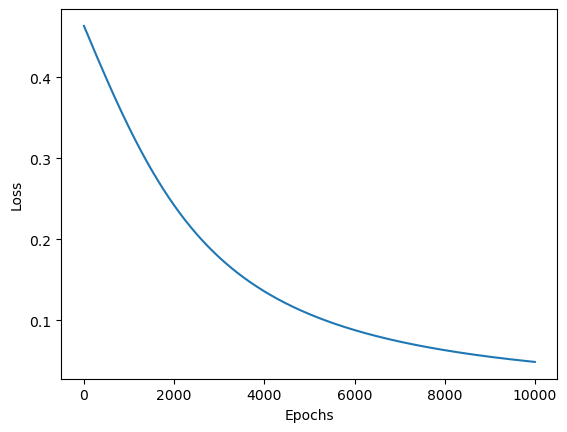

In [208]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [209]:
df4 = df3.copy()

In [210]:
digits = [126, 48, 109, 121, 51, 91, 31, 112, 127, 115]
for i in range(128,428):
    df4.loc[i] = df4.loc[digits[i%10]]

In [211]:
df4 = df4.sample(frac=1, random_state=1).reset_index()
df4.drop(columns="index", inplace=True)

In [212]:
df4

,Segment code,Digit
0,"[1, 1, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,"[0, 1, 1, 0, 0, 1, 1]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
3,"[1, 1, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,"[0, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
423,"[1, 0, 1, 1, 0, 1, 1]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
424,"[1, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
425,"[0, 0, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
426,"[1, 0, 1, 1, 0, 1, 1]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


### Repeating the problem for A-Z Handwritten Alphabets using 5×5 grid structure. Use multiple patterns for each handwritten alphabet.

##### Alphabet Recognition

In [213]:
M = []
N = []
for i in range(26):
    N.append([1])

In [214]:
M.append([0,1,1,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,0,1,0,
          0,1,0,1,0])

M.append([0,1,1,0,0,
          0,1,0,1,0,
          0,1,1,0,0,
          0,1,0,1,0,
          0,1,1,0,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,1,1,0])

M.append([0,1,1,0,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,1,0,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,0,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,1,1,
          0,1,0,1,0,
          0,1,1,1,0])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,0,1,0,
          0,1,0,1,0])

M.append([0,1,1,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,1,1,1,0])

M.append([0,1,1,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,1,1,0,0])

M.append([0,1,0,1,0,
          0,1,1,0,0,
          0,1,0,0,0,
          0,1,1,0,0,
          0,1,0,1,0])

M.append([0,1,0,0,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,0,0,0,
          0,1,1,1,0])

M.append([1,0,0,0,1,
          1,1,0,1,1,
          1,0,1,0,1,
          1,0,0,0,1,
          1,0,0,0,1])

M.append([1,0,0,0,1,
          1,1,0,0,1,
          1,0,1,0,1,
          1,0,0,1,1,
          1,0,0,0,1])

M.append([0,0,1,0,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,0])

M.append([0,1,1,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,0,0,0,
          0,1,0,0,0])

M.append([0,0,1,0,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,1])

M.append([0,1,1,1,0,
          0,1,0,1,0,
          0,1,1,1,0,
          0,1,1,0,0,
          0,1,0,1,0])

M.append([0,1,1,1,0,
          0,1,0,0,0,
          0,1,1,1,0,
          0,0,0,1,0,
          0,1,1,1,0])

M.append([0,1,1,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,1,1,0])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,0])

M.append([1,0,0,0,1,
          1,0,0,0,1,
          1,0,1,0,1,
          1,1,0,1,1,
          1,0,0,0,1])

M.append([1,0,0,0,1,
          0,1,0,1,0,
          0,0,1,0,0,
          0,1,0,1,0,
          1,0,0,0,1])

M.append([0,1,0,1,0,
          0,1,0,1,0,
          0,0,1,0,0,
          0,0,1,0,0,
          0,0,1,0,0])

M.append([1,1,1,1,1,
          0,0,0,1,0,
          0,0,1,0,0,
          0,1,0,0,0,
          1,1,1,1,1])

In [215]:
import random

In [216]:
for i in range(74):
    M.append([])
    for j in range(25):
        k = random.random()
        if k >= 0.5:
            k=1
        else:
            k=0
        M[26+i].append(k)
    tmp = 1
    for z in range(25+i-1):
        
        if M[25+i]==M[z]:
            i = i-1
            tmp = 0
            M.pop()
            break
    if tmp != 0:
        N.append([0]) 

In [217]:
dfa = pd.DataFrame()

In [218]:
dfa['Grid'] = M

In [219]:
dfa['Alphabet'] = N

In [220]:
dfa

,Grid,Alphabet
0,"[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, ...",[1]
1,"[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...",[1]
2,"[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",[1]
3,"[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, ...",[1]
4,"[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",[1]
...,...,...
95,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, ...",[0]
96,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...",[0]
97,"[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ...",[0]
98,"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, ...",[0]


In [221]:
M = np.array(M)
N = np.array(N)

In [222]:
M.shape[1]

25

In [223]:
input_size = M.shape[1]
hidden_size = 2
output_size = 1
learning_rate = 0.00001
epochs = 10000

In [224]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
losses = nn.train(M, N, epochs)

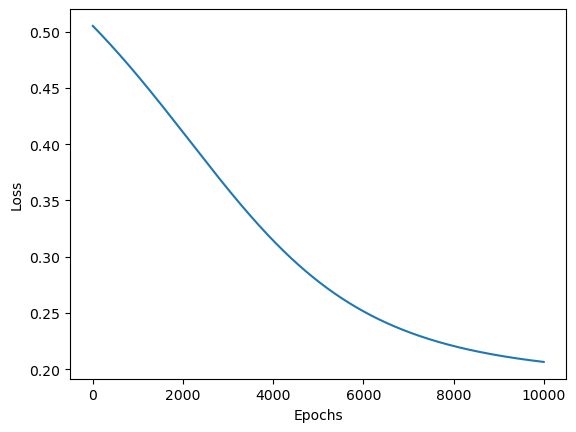

In [225]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [226]:
input_size = M.shape[1]
hidden_size = 2
output_size = 1
learning_rate = 0.001
epochs = 2000
k_folds = 4

In [227]:
accuracy_scoresA = []
specificity_scoresA = []
sensitivity_scoresA = []
precision_scoresA = []
recall_scoresA = []
f1_scoresA = []

In [228]:
kf = KFold(n_splits=k_folds, shuffle=False)

In [229]:
for train_index, val_index in kf.split(M):
    X_train, X_val = M[train_index], M[val_index]
    y_train, y_val = N[train_index], N[val_index]
    
    nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
    losses = nn.train(X_train,y_train, epochs)
    
    hidden_layer_input = np.dot(X_val, nn.weights_input_hidden) + nn.bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, nn.weights_hidden_output) + nn.bias_output
    output_layer_output = sigmoid(output_layer_input)
    
    predictions = (output_layer_output >= 0.5).astype(int)
    
    accuracy = accuracy_score(y_val, predictions)
    
    tn,fp,fn,tp = confusion_matrix(y_val,predictions).ravel()
    
    if tn+fp==0:
        specificity = 1
    else:
        specificity = tn / (tn + fp)
        
    if tp+fn==0:
        sensitivity = 1
    else:
        sensitivity = tp / (tp + fn)
        
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    
    accuracy_scoresA.append(accuracy)
    specificity_scoresA.append(specificity)
    sensitivity_scoresA.append(sensitivity)
    precision_scoresA.append(precision)
    recall_scoresA.append(recall)
    f1_scoresA.append(f1)

C:\Users\prash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: not enough values to unpack (expected 4, got 1)

In [230]:
avg_accuracyA = np.mean(accuracy_scoresA)
avg_specificityA = np.mean(specificity_scoresA)
avg_sensitivityA = np.mean(sensitivity_scoresA)
avg_precisionA = np.mean(precision_scoresA)
avg_recallA = np.mean(recall_scoresA)
avg_f1A = np.mean(f1_scoresA)

print(f"Average Accuracy: {avg_accuracyA}")
print(f"Average Specificity: {avg_specificityA}")
print(f"Average Sensitivity: {avg_sensitivityA}")
print(f"Average Precision: {avg_precisionA}")
print(f"Average Recall: {avg_recallA}")
print(f"Average F1 Score: {avg_f1A}")

Average Accuracy: 0.48
Average Specificity: 1.0
Average Sensitivity: 0.0
Average Precision: 0.0
Average Recall: 0.0
Average F1 Score: 0.0
